In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm
import torch
config = {
    # "font.size": 
    'font.family': 'Arial',
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
}
rcParams.update(config)
import seaborn as sns


In [ ]:
r = np.load(open('fashion_with_size_0112.npz', 'rb'))
acc = r['acc_list']
te_acc = r['te_acc_list']

acc2 = r['acc2_list']
te_acc2 = r['te_acc2_list']

acc_total = r['acc_total_list']
te_acc_total = r['te_acc_total_list']

x = np.arange(len(acc))
# plt.plot(x, acc)
# plt.plot(x, te_acc)
plt.plot(x, acc2)
# plt.plot(x, te_acc2)
# plt.plot(x, acc_total)
# plt.plot(x, te_acc_total)
plt.show()

# processing the EMNIST data

In [ ]:
te_file = 'data/huang_EMNIST_letters_10252237_te.pt'
te_data =  torch.load(te_file)

te_data[0].shape
te_data[1].shape

data = te_data[0]
targets = te_data[1]
class_codes = set(targets.numpy())

list_data = []
list_target = []
for x, y in zip(data, targets):
        if y.numpy() not in [0, 2, 3, 9]:
                list_data.append(x)
                list_target.append(y)

new_data = torch.stack(list_data)
new_targets = torch.stack(list_target)

save_file = 'data/huang_EMNIST_8cls_oldtarget_0210_te.pt'
torch.save((new_data, new_targets), save_file)

# EMNIST class crop (with old class coding)

In [ ]:
# 3 classes
list_data = []
list_target = []
for x,y in zip(data, targets):
        if y.numpy() not in [0, 1, 2, 3, 6, 7, 9, 10]:
                list_data.append(x)
                list_target.append(y)

new_data = torch.stack(list_data)
new_targets = torch.stack(list_target)

save_file = 'data/huang_EMNIST_3cls_oldtarget_0210_te.pt'
torch.save((new_data, new_targets), save_file)

# FMNIST class crop (with old class coding)

In [ ]:
te_file = 'data/huang_FMNIST_letters_08181649_te.pt'
te_data =  torch.load(te_file)

te_data[0].shape
te_data[1].shape

data = te_data[0]
targets = te_data[1]
class_codes = set(targets.numpy())

# 5 class
list_data = []
list_target = []
for x, y in zip(data, targets):
        if y.numpy() not in [3, 4]:
                list_data.append(x)
                list_target.append(y)

new_data = torch.stack(list_data)
new_targets = torch.stack(list_target)
save_file = 'data/huang_FMNIST_5cls_oldtarget_0211_te.pt'
torch.save((new_data, new_targets), save_file)

# plotting

[0.03296992481203007, 0.007333333333333334, 0.0008923512747875354]


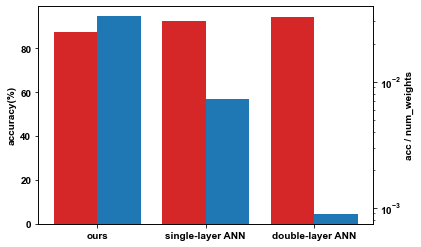

In [5]:
import seaborn as sns

fig, ax1 = plt.subplots()

x = np.arange(3)

acc = [87.7, 92.4, 94.5]
num_weights = [2660, 12600, 105900]
acc_div_nweights = [acc[i] / num_weights[i] for i in range(3)]
print(acc_div_nweights)
ax1.bar(x - 0.2, acc, width=0.4, label='accuracy', color='tab:red')
ax1.set_ylabel('accuracy(%)')

ax2 = ax1.twinx()
ax2.bar(x + 0.2, acc_div_nweights, width=0.4, label='accuracy / num_weights', color='tab:blue')
# ax2.bar(x + 0.2, num_weights, width=0.4, label='num_weights', color='tab:blue')
ax2.set_yscale('log')
ax2.set_ylabel('acc / num_weights')

plt.xticks(x, ['ours', 'single-layer ANN', 'double-layer ANN'])
# plt.savefig('plots/accuracy_vs_num_weights.pdf', format='pdf')
plt.savefig('plots/accuracy_ratio.pdf', format='pdf')
plt.show()

## tranining flops

[5740, 28700, 211800]
[13390, 66590, 530400]


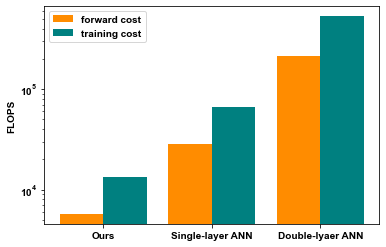

In [3]:
# rc foward
rc_readout_foward_flops = 140 * 5 + 140 * 2 * (10 + 5 + 3)
# rc backward
rc_cross_entro_bp = 90
rc_readout_bp = 140 * (10 + 5 + 3) * 3

# single layer ann forward
ann_forward_flops = 700 * 5 + 700 * 2 * (10 + 5 + 3)
# single layer ann backward
ann_cross_entro_bp = 90
ann_bp = 700 * (10 + 5 + 3) * 3

# double layer ann forward
hid_dim = 50
ann2_forward_flops = 700 * hid_dim * 2 * 3 + 2 * hid_dim * (10 + 5 + 3)
# double layer ann backward
ann2_bp = hid_dim * 18 * 4 + 700 * hid_dim * 3 * 3

x_labels = ['Ours', 'Single-layer ANN', 'Double-lyaer ANN']
forward_flops = [rc_readout_foward_flops, ann_forward_flops, ann2_forward_flops]
training_flops = [rc_readout_foward_flops + rc_cross_entro_bp + rc_readout_bp, ann_forward_flops + ann_cross_entro_bp + ann_bp, ann2_forward_flops + ann2_bp]
print(forward_flops)
print(training_flops)
plt.figure()
x = np.arange(3)
plt.bar(x - 0.2, forward_flops, width=0.4, label='forward cost', color='darkorange')
plt.bar(x + 0.2, training_flops, width=0.4, label='training cost', color='teal')
plt.legend()
plt.yscale('log')
plt.xticks(x, x_labels)
plt.ylabel('FLOPS')

plt.savefig('plots/flops.pdf', format='pdf')
plt.show()

import pandas as pd
pd.DataFrame(np.array([x_labels, forward_flops, training_flops]).T, columns=['model', 'forward', 'training']).to_excel('flops.xlsx')

# get pdf version of results

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm, rcParams
import pandas as pd
# rcParams['font.family'] = 'Times New Roman'
# rcParams['font.family'] = 'Arial'
plt.rc('font', family='Arial', weight='bold')
# bold = fm.FontProperties(weight='bold')

mnist_results_file = 'results/ann_2layer_MNIST_letters_device_02141221/train_results.npz'
fmnist_results_file = 'results/ann_2layer_FMNIST_letters_device_02141218/train_results.npz'
emnist_results_file = 'results/ann_2layer_EMNIST_letters_device_02141218/train_results.npz'

mnist_results = np.load(mnist_results_file)
fmnist_results = np.load(fmnist_results_file)
emnist_results = np.load(emnist_results_file)

list(mnist_results.keys())

# plot training curves
mnist_acc_list = mnist_results['acc_list']
mnist_loss_list = mnist_results['loss_list']
mnist_te_acc_list = mnist_results['te_acc_list']
mnist_te_loss_list = mnist_results['te_loss_list']
mnist_conf_mats = mnist_results['conf_mats']

emnist_acc_list = emnist_results['acc_list']
emnist_loss_list = emnist_results['loss_list']
emnist_te_acc_list = emnist_results['te_acc_list']
emnist_te_loss_list = emnist_results['te_loss_list']
emnist_conf_mats = emnist_results['conf_mats']

fmnist_acc_list = fmnist_results['acc_list']
fmnist_loss_list = fmnist_results['loss_list']
fmnist_te_acc_list = fmnist_results['te_acc_list']
fmnist_te_loss_list = fmnist_results['te_loss_list']
fmnist_conf_mats = fmnist_results['conf_mats']

# conf mat index
m_cm_idx = mnist_te_acc_list.argmax()
f_cm_idx = fmnist_te_acc_list.argmax()
e_cm_idx = emnist_te_acc_list.argmax()


# plot
# curves
fig, ax = plt.subplots()
acc = ax.plot(mnist_acc_list, label='train acc', c='tab:red')
te_acc = ax.plot(mnist_te_acc_list, label='test acc', c='tab:blue', linestyle='-.')
# ax2 = ax.twinx()
# loss = ax2.plot(mnist_loss_list, label='train loss', c='tab:red')
# te_loss = ax2.plot(mnist_te_loss_list, label='test loss', c='tab:red', linestyle='-.')
# ax2.set_ylim((0, 0.5))
# add legedn
# lns = acc + te_acc + loss + te_loss
# labels = [l.get_label() for l in lns]
# ax.legend(lns, labels)
plt.legend()
plt.savefig('plots/mnist_curves.pdf', format='pdf')
fig.show()
plt.close()

# emnist curves
fig, ax = plt.subplots()
ax.plot(emnist_acc_list, label='train acc', c='tab:red')
ax.plot(emnist_te_acc_list, label='test acc', c='tab:blue', linestyle='-.')
# ax2 = ax.twinx()
# ax2.plot(emnist_loss_list, label='train loss', c='tab:red')
# ax2.plot(emnist_te_loss_list, label='test loss', c='tab:red', linestyle='-.')
# ax2.set_ylim((0, 0.5))
plt.legend()
plt.savefig('plots/emnist_curves.pdf', format='pdf')
fig.show()
plt.close()

# fmnist curves
fig, ax = plt.subplots()
ax.plot(fmnist_acc_list, label='train acc', c='tab:red')
ax.plot(fmnist_te_acc_list, label='test acc', c='tab:blue', linestyle='-.')
# ax2 = ax.twinx()
# ax2.plot(fmnist_loss_list, label='train loss', c='tab:red')
# ax2.plot(fmnist_te_loss_list, label='test loss', c='tab:red', linestyle='-.')
# ax2.set_ylim((0, 0.5))
plt.legend()
plt.savefig('plots/fmnist_curves.pdf', format='pdf')
fig.show()
plt.close()

# confusion matrices
mnist_conf_mat_df = pd.DataFrame(mnist_conf_mats[m_cm_idx], index=list(range(10)), columns=list(range(10)))
mnist_conf_mats_normalized = mnist_conf_mat_df.div(mnist_conf_mat_df.sum(axis=1), axis=0)
plt.figure()
sns.heatmap(mnist_conf_mat_df, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('plots/mnist_conf_mat.pdf', format='pdf')
plt.close()

plt.figure()
sns.heatmap(mnist_conf_mats_normalized, annot=True, fmt='.2f', cmap='YlGnBu')
plt.savefig('plots/mnist_conf_mat_norm.pdf', format='pdf')
plt.close()

# emnist confusion matrices
class_labels = ['L', 'M', 'S']
emnist_conf_mat_df = pd.DataFrame(emnist_conf_mats[e_cm_idx], index=class_labels, columns=class_labels)
emnist_conf_mats_normalized = emnist_conf_mat_df.div(emnist_conf_mat_df.sum(axis=1), axis=0)
plt.figure()
sns.heatmap(emnist_conf_mat_df, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('plots/emnist_conf_mat.pdf', format='pdf')
plt.close()

plt.figure()
sns.heatmap(emnist_conf_mats_normalized, annot=True, fmt='.2f', cmap='YlGnBu')
plt.savefig('plots/emnist_conf_mat_norm.pdf', format='pdf')
plt.close()

# mmnist confusion matrices
class_labels = ['T-shirt', 'Pants', 'Dress', 'Bag', 'Boot']
fmnist_conf_mat_df = pd.DataFrame(fmnist_conf_mats[f_cm_idx], index=class_labels, columns=class_labels)
fmnist_conf_mats_normalized = fmnist_conf_mat_df.div(fmnist_conf_mat_df.sum(axis=1), axis=0)
plt.figure()
sns.heatmap(fmnist_conf_mat_df, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('plots/fmnist_conf_mat.pdf', format='pdf')
plt.close()

plt.figure()
sns.heatmap(fmnist_conf_mats_normalized, annot=True, fmt='.2f', cmap='YlGnBu')
plt.savefig('plots/fmnist_conf_mat_norm.pdf', format='pdf')
plt.close()

# garment with size plotting

dict_keys(['feat', 'clothes_size', 'cls_acc', 'te_target_rearange'])


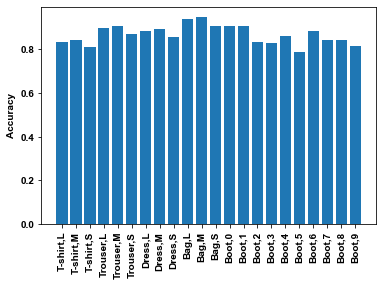

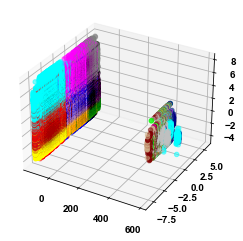

In [13]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
save_dir_name = 'results/EMNIST_test_with_size_04172347'
file = os.path.join(save_dir_name, 'feats.pt')
feats_dict = torch.load(file)
print(feats_dict.keys())
feat_tensor = feats_dict['feat']
clothes_size = feats_dict['clothes_size']
cls_acc = feats_dict['cls_acc']
te_target_rearange = feats_dict['te_target_rearange']


# cls boxes
plt.figure()
# plt.bar(range(len(clothes_size)), cls_acc)
y = plt.Normalize(min(cls_acc), max(cls_acc))
norm_y = y(cls_acc)
color = cm.get_cmap(name='tab20', lut=None)(norm_y)
plt.ylabel('Accuracy')
plt.bar(clothes_size, cls_acc)
plt.xticks(rotation=90)
plt.savefig(f'{save_dir_name}/cls_acc.pdf', format='pdf')
plt.show()

# dimension reduction
map_color = ['black', 'red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
             'lime', 'olive', 'navy', 'teal', 'maroon', 'fuchsia', 'silver', 'aqua', 'gold', 'tan']
class_map = list(set(te_target_rearange.numpy()))
mapped_color = [map_color[class_map.index(i)] for i in te_target_rearange.numpy()]


# feat_tensor = torch.stack(feat, dim=0)

# # plot feature
# plt.imshow(feat_tensor.numpy().T, vmin=-3, vmax=1.5, cmap='bwr')
# plt.savefig(f'plots/feat_full.pdf', format='pdf')
# plt.close()
# plt.imshow(feat_tensor.numpy().T[:, :300], vmin=-3, vmax=1.5, cmap='bwr')
# plt.savefig(f'plots/feat_part.pdf', format='pdf')
# # class clustered feature
# feat_sorted = [f for _, f in sorted(zip(te_target_rearange, feat), key=lambda pair: pair[0])]
# target_sorted = [t for t in sorted(te_target_rearange.numpy())]
# feat_sorted = torch.stack(feat_sorted, dim=0)
# plt.imshow(feat_sorted.numpy().T, vmin=-3, vmax=1.5, cmap='bwr')
# plt.savefig(f'plots/feat_clustered.pdf', format='pdf')
# print([target_sorted.index(i) for i in set(te_target_rearange.numpy())])
# plt.close()
# plt.imshow(feat_sorted.numpy().T[:, :300], vmin=-3, vmax=1.5, cmap='bwr')
# plt.savefig(f'plots/feat_clustered_part.pdf', format='pdf')

# pca = PCA(n_components=2)
# reduced_feat = pca.fit_transform(feat)
# plt.scatter(reduced_feat[:, 0], reduced_feat[:, 1], c=mapped_color, alpha=0.5)
# # fig = plt.figure()
# # ax = fig.add_subplot(projection='3d')
# # ax.scatter(reduced_feat[:, 0], reduced_feat[:, 1], reduced_feat[:, 2], c=mapped_color, alpha=0.5)

# plt.show()
# tsne_reduced_feat = TSNE(n_components=3).fit_transform(feat)
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(tsne_reduced_feat[:, 0], tsne_reduced_feat[:, 1], tsne_reduced_feat[:, 2], c=mapped_color, alpha=0.5)
# # plt.scatter(tsne_reduced_feat[:, 0], tsne_reduced_feat[:, 1], c=mapped_color,alpha=0.5)
# plt.show()

lda = LinearDiscriminantAnalysis(n_components=3)
reduced_feat = lda.fit_transform(feat_tensor, te_target_rearange)
# plt.scatter(reduced_feat[:, 0], reduced_feat[:, 1], c=mapped_color, alpha=0.5)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(reduced_feat[:, 0], reduced_feat[:, 1], reduced_feat[:, 2], c=mapped_color, alpha=0.5)
plt.savefig(f'plots/feat_lda.pdf', format='pdf')
# plt.show()


In [31]:
print(te_target_rearange)

clothes_label = te_target_rearange / 13
clothes_label = torch.floor(clothes_label)
print(clothes_label)
print(len(set(te_target_rearange.tolist())))
# dimension reduction
map_color = ['black', 'red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
             'lime', 'olive', 'navy', 'teal', 'maroon', 'fuchsia', 'silver', 'aqua', 'gold', 'tan']

class_map = list(set(te_target_rearange.numpy()))
mapped_color = [map_color[class_map.index(i)] for i in te_target_rearange.numpy()]
len(mapped_color)
# class_map

clothes_for_letter = ['T-shirt', 'Trouser', 'Dress', 'Bag']
letter = ['L', 'M', 'S']
clothes_for_digit = ['Boot']
digit = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'L', 'M', 'S']

import itertools
clothes_letter = list(itertools.product(clothes_for_letter, letter))
clothes_digit = list(itertools.product(clothes_for_digit, digit))
label = clothes_letter + clothes_digit

tensor([83., 24., 25.,  ..., 25., 76., 23.])
tensor([6., 1., 1.,  ..., 1., 5., 1.])
22


In [ ]:
pca = PCA(n_components=2)
reduced_feat = pca.fit_transform(feat)
plt.scatter(reduced_feat[:, 0], reduced_feat[:, 1], c=mapped_color, alpha=0.5)
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(reduced_feat[:, 0], reduced_feat[:, 1], reduced_feat[:, 2], c=mapped_color, alpha=0.5)

# Overall large confusion matrix

In [11]:
import pandas as pd

# labels
clothes_for_letter = ['T-shirt', 'Trouser', 'Dress', 'Bag', 'Shoes']
# letter = ['L', 'M', 'S']
# clothes_for_digit = ['Boot']
digit = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'L', 'M', 'S']
clothes_letter = [c+','+l for c in clothes_for_letter for l in digit]
# clothes_digit = [c+','+d for c in clothes_for_digit for d in digit]
clothes_size = clothes_letter 

conf_mat_df = pd.read_csv('results/test_with_size_07201146/test_with_size_conf_mat.csv')
del conf_mat_df['Unnamed: 0']
# conf_mat_df.index = clothes_size
# conf_mat_df.columns = clothes_size
# a = conf_mat_df.sum(axis=1)
# a_new = np.where(a==0, 1)
# a_new
conf_normalized = conf_mat_df.divide(conf_mat_df.sum(axis=1), axis=0)
# conf_normalized = conf_mat_df.divide(max(conf_mat_df.sum(axis=1), np.ones(conf_mat_df.shape[0])))

plt.figure(figsize=(20, 16))
sns.heatmap(conf_mat_df, annot=True, fmt='d')
# sns.heatmap(conf_normalized, annot=True, fmt='.2f')
# plt.show()
plt.savefig('plots/overall_conf_mat.pdf')
plt.close()

# Overall conf mat (with old data, 87.62% acc)

In [54]:
conf_mat = np.zeros((50, 50))
conf_mat[1, 1:9] = [274, 1, 1, 5, 0, 0, 0, 38]
conf_mat[1, 19] = 3
conf_mat[1, 34] = 3
conf_mat[2, 2:10] = [280, 3, 0, 7, 0, 0, 0, 33]
conf_mat[2, 20] = 4
conf_mat[2, 35:37] = [13, 1]
conf_mat[3, 1:11] = [7, 2, 279, 1, 0, 6, 0, 2, 1, 26]
conf_mat[3, 21] = 2
conf_mat[3, 34:37] = [1, 0, 7]
conf_mat[4, 1:9] = [11, 0, 0, 290, 2, 4, 0, 22]
conf_mat[4, 34] = 1
conf_mat[5, 2:10]  = [5, 0, 1, 306, 1, 0, 0, 21]
conf_mat[5, 35] = 1
conf_mat[6, 3:11] = [6, 18, 2, 291, 0, 1, 0, 15]
conf_mat[6, 36] = 2
conf_mat[8, 1:11] = [24, 0, 1, 7, 0, 0, 0, 290, 0, 6]
conf_mat[8, 34] = 3
conf_mat[9, 2:10] = [27, 0, 0, 2, 0, 0, 1, 306]
conf_mat[9, 35] = 6
conf_mat[10, 3:11] = [15, 1, 0, 8, 0, 6, 3, 290]
conf_mat[10, 36] = 4
conf_mat[34, 31:37] = [1, 0, 0, 325, 0, 6]
conf_mat[34, 1:9] = [7, 0, 0, 3, 0, 0, 0, 4]
conf_mat[34, 47] = 1
conf_mat[35, 32:37] = [2, 0, 5, 304, 1]
conf_mat[35, 2:10] = [7, 0, 0, 1, 0, 0, 0, 3]
conf_mat[35, 48] = 3
conf_mat[36, 33:37] = [2, 16, 4, 294]
conf_mat[36, 3] = 7
conf_mat[36, 10] = 1
conf_mat[36, 49] = 1
conf_mat[36, 21] = 2
conf_mat[37, 37:39] = [106, 2]
conf_mat[37, 11] = 1
conf_mat[37, 22] = 3
conf_mat[38, 38:43] = [105, 1, 0, 0, 2]
conf_mat[38, 12] = 1
conf_mat[38, 23] = 3
conf_mat[38, 29] = 1
conf_mat[39, 37:46] = [2, 0, 92, 1, 1, 0, 1, 3, 4]
conf_mat[39, 7] = 1
conf_mat[40, 39:47] = [2, 73, 0, 4, 0, 0, 1, 1]
conf_mat[40, 13] = 3
conf_mat[41, 37:47] = [1, 0, 0, 0, 73, 0, 0, 0, 3, 3]
conf_mat[41, 14] = 2
conf_mat[42, 37:46] = [1, 0, 0, 1, 2, 75, 0, 2, 1]
conf_mat[43, 42:44] = [2, 78]
conf_mat[43, 0] = 1
conf_mat[44, 39:47] = [4, 0, 1, 0, 0, 84, 0, 8]
conf_mat[44, 17:19] = [1, 1]
conf_mat[44, 28] = 7
conf_mat[45, 38: 46] = [1, 1, 5, 0, 0, 4, 2, 91]
conf_mat[45, 29] = 5
conf_mat[46, 40:47] = [3, 7, 0, 0, 0, 0, 87]
conf_mat[46, 18:23] = [2, 0, 0, 0, 1]
conf_mat[46, 30] = 7

In [55]:
conf_mat *= 8
conf_mat[44, 17] = conf_mat[44, 17] +2
conf_mat[44, 18] = conf_mat[44, 18] -2
conf_mat[1, 2] = conf_mat[1, 2] - 3
conf_mat[1, 3] = conf_mat[1, 3] + 1
conf_mat[1, 19] = conf_mat[1, 19] + 2
conf_mat[1, 34] = conf_mat[1, 34] + 5
conf_mat[1, 4] = conf_mat[1, 4] -5

conf_mat[10, 10] = conf_mat[10, 10] -1
conf_mat[10, 4] = conf_mat[10, 4] + 3
conf_mat[10, 9] = conf_mat[10, 9] - 3
conf_mat[10, 8] = conf_mat[10, 8] - 1

conf_mat[3, 3] = conf_mat[3, 3] -3
conf_mat[3, 4] = conf_mat[3, 4] +3
conf_mat[3, 9] = conf_mat[3, 9] +1
conf_mat[3, 1] = conf_mat[3, 1] -1

conf_mat[4, 4] = conf_mat[4, 4] - 1
conf_mat[4, 1] = conf_mat[4, 1] + 1
conf_mat[4, 5] = conf_mat[4, 5] + 2
conf_mat[4, 6] = conf_mat[4, 6] - 4
conf_mat[4, 8] = conf_mat[4, 6] + 2

conf_mat[9, 35] = conf_mat[9, 35] - 4
conf_mat[9, 8] = conf_mat[9, 8] + 5
conf_mat[9, 5] = conf_mat[9, 5] - 1

conf_mat[34, 1] = conf_mat[34, 1] - 10
conf_mat[34, 4] = conf_mat[34, 4] + 10

conf_mat[35, 2] = conf_mat[35, 2] + 9
conf_mat[35, 9] = conf_mat[35, 9] - 4
conf_mat[35, 32] = conf_mat[35, 32] - 5
# conf_mat[36, 36] = conf_mat[36, 36] 
conf_mat[38, 12] = conf_mat[38, 12] -3
conf_mat[38, 23] = conf_mat[38, 23] +1
conf_mat[38, 29] = conf_mat[38, 29] +1
conf_mat[38, 39] = conf_mat[38, 39] -2
conf_mat[38, 42] = conf_mat[38, 42] +3

conf_mat[39, 37] = conf_mat[39, 37] +1
conf_mat[39, 40] = conf_mat[39, 40] +3
conf_mat[39, 41] = conf_mat[39, 41] -2
conf_mat[39, 43] = conf_mat[39, 43] -1
conf_mat[39, 44] = conf_mat[39, 44] +1
conf_mat[39, 45] = conf_mat[39, 45] -2

conf_mat[40, 13] = conf_mat[40, 13] -3
conf_mat[40, 39] = conf_mat[40, 13] -4
conf_mat[40, 43] = conf_mat[40, 43] +7


conf_mat[41, 41] = conf_mat[41, 41] -5
conf_mat[41, 37] = conf_mat[41, 37] +2
conf_mat[41, 14] = conf_mat[41, 14] +2
conf_mat[41, 45] = conf_mat[41, 45] + 7
conf_mat[41, 46] = conf_mat[41, 46] -6

conf_mat[6, 3] = conf_mat[6, 3] + 1
conf_mat[6, 8] = conf_mat[6, 8] - 6
conf_mat[6, 10] = conf_mat[6, 10] + 5

conf_mat[42, 40] = conf_mat[42, 40] - 1
conf_mat[42, 44] = conf_mat[42, 44] + 1

conf_mat = conf_mat.astype(int)


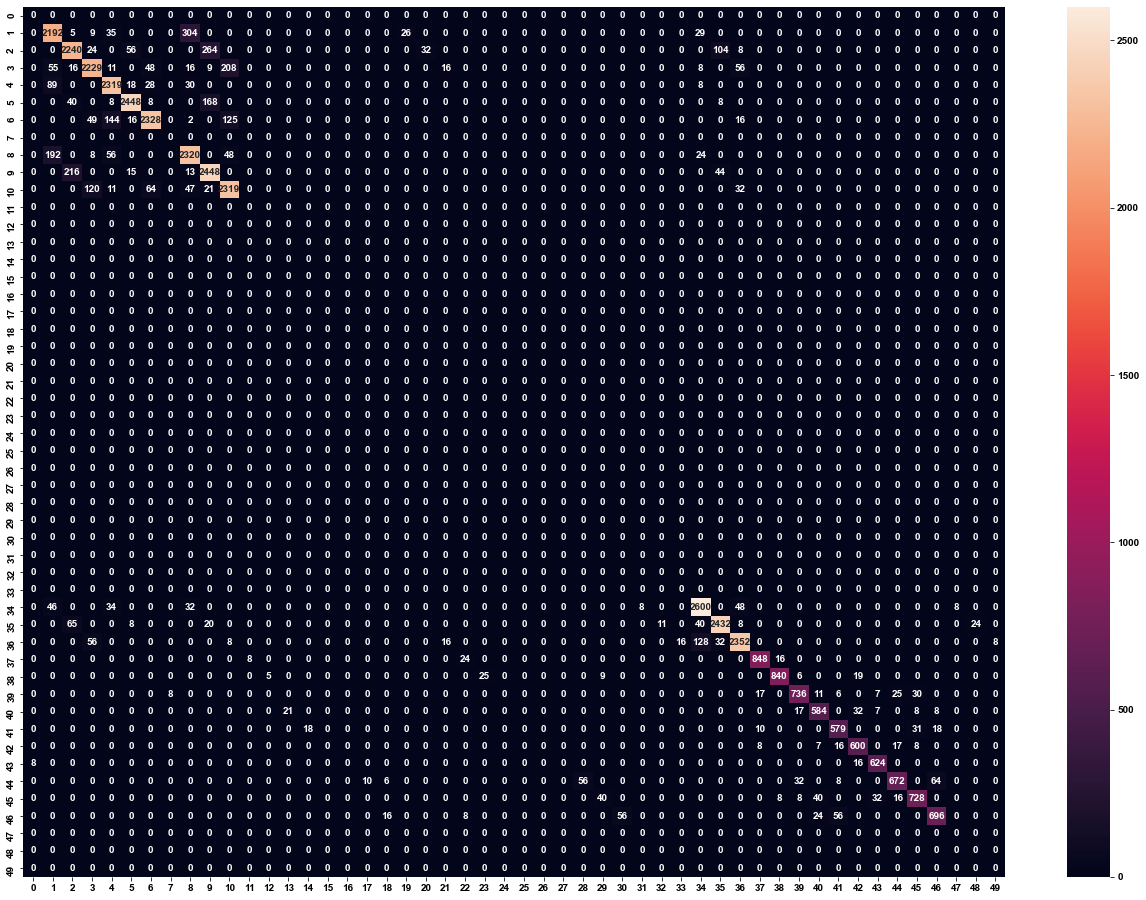

In [57]:
import pandas as pd

# labels
clothes_for_letter = ['T-shirt', 'Trouser', 'Dress', 'Bag', 'Shoes']
# letter = ['L', 'M', 'S']
# clothes_for_digit = ['Boot']
digit = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'L', 'M', 'S']
clothes_letter = [c+','+l for c in clothes_for_letter for l in digit]
# clothes_digit = [c+','+d for c in clothes_for_digit for d in digit]
clothes_size = clothes_letter 

# conf_mat_df = pd.read_csv('results/test_with_size_07201146/test_with_size_conf_mat.csv')
conf_mat_df = pd.DataFrame(conf_mat)
# del conf_mat_df['Unnamed: 0']
# conf_mat_df.index = clothes_size
# conf_mat_df.columns = clothes_size
# a = conf_mat_df.sum(axis=1)
# a_new = np.where(a==0, 1)
# a_new
conf_normalized = conf_mat_df.divide(conf_mat_df.sum(axis=1), axis=0)
# conf_normalized = conf_mat_df.divide(max(conf_mat_df.sum(axis=1), np.ones(conf_mat_df.shape[0])))

plt.figure(figsize=(22, 16))
sns.heatmap(conf_mat_df, annot=True, fmt='d')
# sns.heatmap(conf_normalized, annot=True, fmt='.2f')
plt.savefig('plots/overall_conf_mat_87.pdf')
plt.show()
plt.close()

## conf mat font adjusting

In [15]:
dir = 'log/p_NDI_05s_ete_11291421'
filename = 'MNIST_train_results.npz'
path = os.path.join(dir, filename)
result_dict = np.load(path)

k = result_dict.keys()
print(list(k))

conf_mats = result_dict['conf_mats']

['acc_list', 'te_acc_list', 'loss_list', 'te_loss_list', 'conf_mats']


### readout layers

In [22]:
MNIST_readout = torch.load(os.path.join(dir, 'MNIST_88180.pt')).fc_out.weight.data.numpy()
FMNIST_readout = torch.load(os.path.join(dir, 'FMNIST_91760.pt')).fc_out.weight.data.numpy()
EMNIST_readout = torch.load(os.path.join(dir, 'EMNIST_98042.pt')).fc_out.weight.data.numpy()

plotting

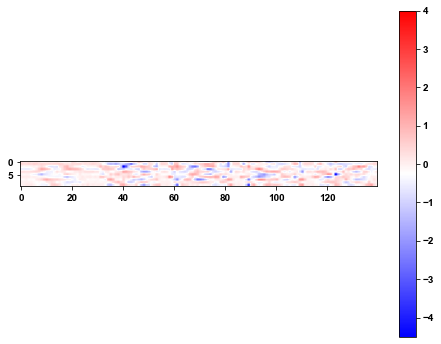

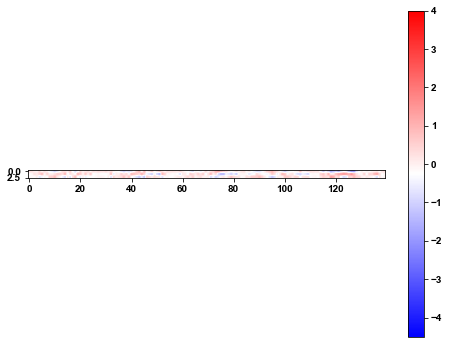

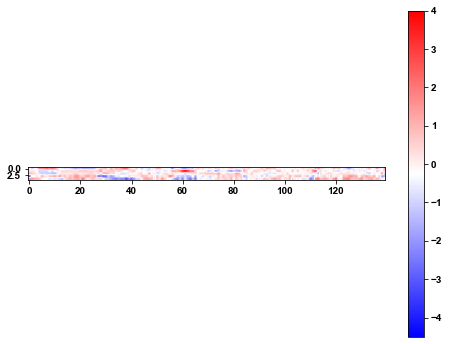

In [25]:
name = ['mnist', 'emnist', 'fmnist']
weights = [MNIST_readout, EMNIST_readout, FMNIST_readout]
for readout, name in zip(weights, name):
    plt.figure(figsize=(8, 6))
#     sns.heatmap(readout)
    plt.imshow(readout, cmap='bwr', vmin=-4.5, vmax=4)
    plt.colorbar()
    plt.savefig(f'{dir}/{name}_readout.pdf')
    plt.show()
    plt.close()